
***Modelos de Machine Learning & Selecionando o Modelo***

Aprendizado supervisionado é onde temos uma label, um "target", um objetivo definido e temos este objetivo para o aprendizado do modelo.

Com o objetivo definido, observamos os dados da variável "target(y)", se tiver uma variável categorica temos um caso de classificação, se tivermos uma variável com dados numericos continuos, temos um caso de regressão linear.

Algoritmos de regressão: Regressão Linear, Random Forest Regressor, Gradient Boosting Regressor, XGBoost Regressor, entre outros, mas sempre com o final regressor.

Algoritmos de classificação: Naive Bayes, Random Forest Classifier, Gradient Boosting Classsifier, XGBoost Classifier, entre outros mas sempre com o final Classifier.

---------------------
---------------------


***O que realizar com este conjunto de dados?***

Análise exploratória - Explore os dados em busca de comportamentos, padrões, dados que precisam ser tratados, excluidos, etc. Use gráficos para te ajudar nesta etapa.

Feature Engineering - Trate os dados que precisam ser ajustados como alteração de texto para numérico, transformações de datas, ajuste de distribuição, etc.

Separe os dados entre treino e teste com a fração de teste que desejar.

Treine um ou mais modelos. Lembre-se que se for usar algum algoritmo como random forest, xgboost, etc use a opção regressor, por exemplo (randomforestregressor).

Teste o seu modelo nos dados de teste e veja a performance do modelo através do R2.

As bibliotecas utilizadas no código fornecido são:

Os: fornece uma maneira de interagir com o sistema operacional,
permitindo a manipulação de caminhos de arquivos, pastas e outras funcionalidades relacionadas ao sistema.

Pandas: é uma biblioteca de análise de dados que fornece estruturas de dados de alto desempenho e fáceis
de usar, além de ferramentas de manipulação e análise de dados.

Matplotlib.pyplot: é uma biblioteca para criação de gráficos e visualizações de dados em Python.

PIL: é a biblioteca Python Imaging Library, que fornece suporte para abrir, manipular e salvar muitos formatos diferentes de imagens.

Numpy: é uma biblioteca numérica em Python que fornece suporte para trabalhar com arrays e operações matemáticas eficientes.

Gensim: é uma biblioteca de processamento de linguagem natural (PLN) que permite treinar,
carregar e usar modelos de aprendizado de máquina para processamento de texto.

Re: é um módulo Python que fornece operações de correspondência de padrões por meio de expressões regulares.

Nltk: é a biblioteca Natural Language ‘Toolkit’, que fornece ferramentas para processamento de texto e PLN,
como tokenização, segmentação de frases, ‘stop’ words, entre outros.

Seaborn: é uma biblioteca de visualização de dados baseada no matplotlib que fornece uma ‘interface’ de alto nível
para criação de gráficos estatísticos atraentes e informativos.

statsmodels: é uma biblioteca estatística em Python que fornece classes e funções para estimar modelos estatísticos,
realizar testes estatísticos e explorar dados estatísticos.

Wordcloud: é uma biblioteca para criação de nuvens de palavras a partir de textos.

# Atividade 2

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import gensim
import re
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.corpus import stopwords
from pprint import pprint
from wordcloud import WordCloud
import logging
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_squared_log_error
import statsmodels.api as sm
from xgboost import XGBRegressor

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mathe\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mathe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
#Lê o arquivo único do 1° Exercício
df = pd.read_csv("C:/Treinamento-Data-Science/Atividade 1/df_full.csv")
df.shape

C:\Users\mathe\AppData\Local\Temp\ipykernel_5536\3086869833.py:2: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("C:/Treinamento-Data-Science/Atividade 1/df_full.csv")


(1206072, 23)

In [3]:
df.sample(5)

,AnoCalendario,DataArquivamento,DataAbertura,CodigoRegiao,Regiao,UF,strRazaoSocial,strNomeFantasia,Tipo,NumeroCNPJ,RadicalCNPJ,RazaoSocialRFB,NomeFantasiaRFB,CNAEPrincipal,DescCNAEPrincipal,Atendida,CodigoAssunto,DescricaoAssunto,CodigoProblema,DescricaoProblema,SexoConsumidor,FaixaEtariaConsumidor,CEPConsumidor
1110168,2016,2016-02-18 09:48:22.000,2015-12-30 12:08:24.000,2,Nordeste,PE,"CREFISA S/A - CRÉDITO, FINANCIAMENTO E INVESTI...",CREFISA S/A,1,6.077920e+13,60779196.0,CREFISA SA CREDITO FINANCIAMENTO E INVESTIMENTOS,NaN,6436100.0,"SOCIEDADES DE CRÉDITO, FINANCIAMENTO E INVESTI...",S,53,Banco comercial,28.0,Cobrança indevida/abusiva,F,entre 51 a 60 anos,53230080.0
904597,2015,2015-10-19 16:34:23.000,2015-09-18 14:15:25.000,3,Sudeste,SP,TELEFONICA BRASIL S/A,VIVO/TELEFÔNICA,1,2.558157e+12,2558157.0,TELEFONICA BRASIL S.A.,NaN,6110801.0,SERVIÇOS DE TELEFONIA FIXA COMUTADA - STFC,S,187,Telefonia Celular,134.0,Cobrança indevida/abusiva,F,Nao Informada,NaN
757500,2015,2015-04-30 16:35:44.000,2014-12-03 14:18:02.000,2,Nordeste,AL,WHIRLPOOL S.A,UNIDADE DE ELETRODOMESTICOS,1,5.910600e+13,59105999.0,WHIRLPOOL S.A,UNIDADE DE ELETRODOMESTICOS,2751100.0,"FABRICAÇÃO DE FOGÕES, REFRIGERADORES E MÁQUINA...",S,94,Geladeira e Freezer,105.0,Produto com vício,F,entre 41 a 50 anos,57030530.0
399729,2013,2013-02-20 13:27:41.000,2011-09-05 13:57:35.000,5,Centro-oeste,DF,NOVO MUNDO MOVEIS E UTILIDADES LTDA,NOVO MUNDO,1,1.534080e+12,1534080.0,NOVO MUNDO MOVEIS E UTILIDADES LTDA,NaN,4753900.0,COMÉRCIO VAREJISTA ESPECIALIZADO DE ELETRODOMÉ...,S,187,Telefonia Celular,133.0,"Garantia - Descumprimento, prazo",F,entre 31 a 40 anos,72815000.0
389707,2013,2013-01-17 10:46:29.000,2012-12-05 09:56:20.000,2,Nordeste,PI,AGUAS E ESGOTOS DO PIAUI SA,AGESPISA,1,6.845747e+12,6845747.0,AGUAS E ESGOTOS DO PIAUI SA,AGESPISA,3600601.0,"CAPTAÇÃO, TRATAMENTO E DISTRIBUIÇÃO DE ÁGUA",S,183,Água / Esgoto,134.0,Cobrança indevida/abusiva,F,entre 21 a 30 anos,64039230.0


In [4]:
# Sample de Somente 1000 Linhas do Arquivo
df_2 = df.sample(1000)
df_2 = df_2.replace({np.nan:""})

# Início da Tokenização
texto=[]
for i in df_2['DescricaoProblema']:
  texto.append(i)

otexto = " ".join(texto)
print(otexto)

Não entrega/demora na entrega do produto Consumidor negativado indevidamente nos serviços de proteção ao credito Garantia (Abrangência, cobertura, etc.) Produto com vício Garantia (Abrangência, cobertura, etc.) Consumidor negativado indevidamente nos serviços de proteção ao credito Não pagamento de indenização Cobrança indevida/abusiva Não entrega/demora na entrega do produto Serviço não fornecido (entrega/instalação/não cumprimento da oferta/contrato) Serviço não concluído /Fornecimento parcial Cobrança indevida/abusiva Garantia (Abrangência, cobertura, etc.) Produto entregue diferente do pedido Cobrança indevida. Serviço não fornecido (entrega/instalação/não cumprimento da oferta/contrato) Produto com vício Produto entregue incompleto Vicio de qualidade (mal executado, inadequado, impróprio) Cobrança indevida/abusiva Garantia (Abrangência, cobertura, etc.) Cobrança indevida/abusiva Cobrança indevida. Garantia (Abrangência, cobertura, etc.) Cobrança indevida. Contrato - Rescisão/alter

In [5]:
# Variável com as informações da Coluna "DescricaoProblema" do Dataset
otexto

'Não entrega/demora na entrega do produto Consumidor negativado indevidamente nos serviços de proteção ao credito Garantia (Abrangência, cobertura, etc.) Produto com vício Garantia (Abrangência, cobertura, etc.) Consumidor negativado indevidamente nos serviços de proteção ao credito Não pagamento de indenização Cobrança indevida/abusiva Não entrega/demora na entrega do produto Serviço não fornecido (entrega/instalação/não cumprimento da oferta/contrato) Serviço não concluído /Fornecimento parcial Cobrança indevida/abusiva Garantia (Abrangência, cobertura, etc.) Produto entregue diferente do pedido Cobrança indevida. Serviço não fornecido (entrega/instalação/não cumprimento da oferta/contrato) Produto com vício Produto entregue incompleto Vicio de qualidade (mal executado, inadequado, impróprio) Cobrança indevida/abusiva Garantia (Abrangência, cobertura, etc.) Cobrança indevida/abusiva Cobrança indevida. Garantia (Abrangência, cobertura, etc.) Cobrança indevida. Contrato - Rescisão/alte

In [6]:
# Limpa a pontuação e números
tokenizer = RegexpTokenizer(r'[A-z]\w*')

# Limpando a Variável
tokens = tokenizer.tokenize(otexto)

# Resultado
print(tokens)

['Não', 'entrega', 'demora', 'na', 'entrega', 'do', 'produto', 'Consumidor', 'negativado', 'indevidamente', 'nos', 'serviços', 'de', 'proteção', 'ao', 'credito', 'Garantia', 'Abrangência', 'cobertura', 'etc', 'Produto', 'com', 'vício', 'Garantia', 'Abrangência', 'cobertura', 'etc', 'Consumidor', 'negativado', 'indevidamente', 'nos', 'serviços', 'de', 'proteção', 'ao', 'credito', 'Não', 'pagamento', 'de', 'indenização', 'Cobrança', 'indevida', 'abusiva', 'Não', 'entrega', 'demora', 'na', 'entrega', 'do', 'produto', 'Serviço', 'não', 'fornecido', 'entrega', 'instalação', 'não', 'cumprimento', 'da', 'oferta', 'contrato', 'Serviço', 'não', 'concluído', 'Fornecimento', 'parcial', 'Cobrança', 'indevida', 'abusiva', 'Garantia', 'Abrangência', 'cobertura', 'etc', 'Produto', 'entregue', 'diferente', 'do', 'pedido', 'Cobrança', 'indevida', 'Serviço', 'não', 'fornecido', 'entrega', 'instalação', 'não', 'cumprimento', 'da', 'oferta', 'contrato', 'Produto', 'com', 'vício', 'Produto', 'entregue', 'i

C:\Users\mathe\AppData\Local\Temp\ipykernel_5536\826148323.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_2['AnoCalendario'])


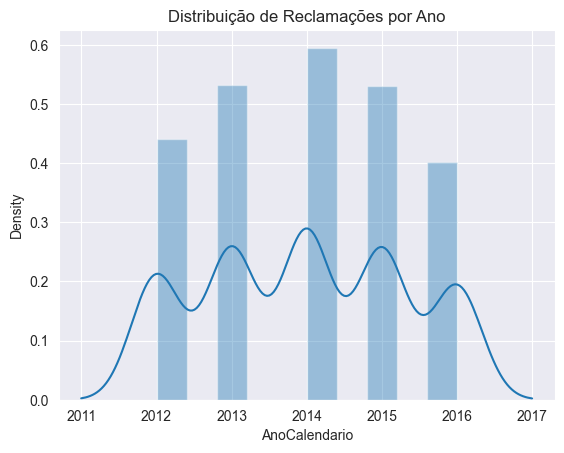

In [7]:
# Gráfico para verificar a frequência de Reclamações
sns.distplot(df_2['AnoCalendario'])
plt.title('Distribuição de Reclamações por Ano')
plt.show()

In [8]:
# Ajustando 0 "datatype" das colunas "DataAbertura" e "DataArquivamento"
df_2['DataAbertura'] = pd.to_datetime(df_2['DataAbertura'])
df_2['DataArquivamento'] = pd.to_datetime(df_2['DataArquivamento'])
df_2.sample(5)

,AnoCalendario,DataArquivamento,DataAbertura,CodigoRegiao,Regiao,UF,strRazaoSocial,strNomeFantasia,Tipo,NumeroCNPJ,RadicalCNPJ,RazaoSocialRFB,NomeFantasiaRFB,CNAEPrincipal,DescCNAEPrincipal,Atendida,CodigoAssunto,DescricaoAssunto,CodigoProblema,DescricaoProblema,SexoConsumidor,FaixaEtariaConsumidor,CEPConsumidor
676945,2014,2014-10-22 14:54:04,2014-09-15 16:55:37,2,Nordeste,PB,BRITANIA ELETRODOMESTICOS LTDA.,BRITANIA ELETRODOMESTICOS,1,76492701000157.0,76492701.0,BRITANIA ELETRODOMESTICOS SA,,8211300.0,SERVIÇOS COMBINADOS DE ESCRITÓRIO E APOIO ADMI...,S,97,"Eletroportáteis ( Batedeira, Liqüidificador, E...",105.0,Produto com vício,F,entre 31 a 40 anos,58310000.0
707862,2014,2014-08-19 14:02:09,2014-04-23 15:03:02,2,Nordeste,PE,BRITANIA ELETRODOMESTICOS LTDA - PHILCO,BRITÂNIA ELETRODOMÉSTICOS LTDA,1,76492701000157.0,76492701.0,BRITANIA ELETRODOMESTICOS SA,,8211300.0,SERVIÇOS COMBINADOS DE ESCRITÓRIO E APOIO ADMI...,N,97,"Eletroportáteis ( Batedeira, Liqüidificador, E...",105.0,Produto com vício,M,entre 41 a 50 anos,53320060.0
170500,2012,2012-03-21 10:35:17,2012-01-23 08:51:23,5,Centro-oeste,MS,BRT SERVIÇOS DE INTERNET S/A,BRT SERVIÇOS DE INTERNET S/A,1,4714634000167.0,4714634.0,BRT SERVICOS DE INTERNET S/A,OI,6190601.0,PROVEDORES DE ACESSO ÀS REDES DE COMUNICAÇÕES,N,186,Telefonia Fixa ( Plano de Expansão / Compra e ...,134.0,Cobrança indevida/abusiva,M,entre 51 a 60 anos,79645110
313795,2013,2013-02-19 14:41:53,2013-01-10 16:15:49,1,Norte,TO,BANCO VOTORANTIM S/A,BANCO VOTORANTIM,1,59588111000103.0,59588111.0,BANCO VOTORANTIM S.A.,,6422100.0,"BANCOS MÚLTIPLOS, COM CARTEIRA COMERCIAL",S,53,Banco comercial,217.0,Antecipação de Financiamento,M,mais de 70 anos,77824140.0
1098070,2016,2016-11-09 14:50:21,2016-08-24 13:33:41,4,Sul,SC,FCA FIAT CHRYSLER PARTICIPACOES BRASIL S.A.,FIAT,1,33171026000151.0,33171026.0,FIAT DO BRASIL S/A,,7020400.0,ATIVIDADES DE CONSULTORIA EM GESTÃO EMPRESARIA...,N,129,Carro Nacional Zero ( Montadora ),105.0,Produto com vício,M,entre 31 a 40 anos,88338480.0


In [9]:
# Criando Coluna de DiaAbertura e DiaArquivamento
df_2['DiaAbertura'] = df_2['DataAbertura'].dt.day_name()
df_2['DiaArquivamento'] = df_2['DataArquivamento'].dt.day_name()
df_2.sample(5)

,AnoCalendario,DataArquivamento,DataAbertura,CodigoRegiao,Regiao,UF,strRazaoSocial,strNomeFantasia,Tipo,NumeroCNPJ,RadicalCNPJ,RazaoSocialRFB,NomeFantasiaRFB,CNAEPrincipal,DescCNAEPrincipal,Atendida,CodigoAssunto,DescricaoAssunto,CodigoProblema,DescricaoProblema,SexoConsumidor,FaixaEtariaConsumidor,CEPConsumidor,DiaAbertura,DiaArquivamento
198162,2012,2012-01-20 17:23:40,2011-11-22 10:58:08,5,Centro-oeste,MS,BANCO RURAL S A,BANCO RURAL,1,33124959003375.0,33124959.0,BANCO RURAL S A,,6422100.0,"BANCOS MÚLTIPLOS, COM CARTEIRA COMERCIAL",S,63,Financeira,250.0,Crédito Consignado,M,mais de 70 anos,79114210,Tuesday,Friday
213830,2013,2013-09-24 10:15:41,2013-07-02 10:41:30,3,Sudeste,MG,NOKIA DO BRASIL TECNOLOGIA LTDA,NOKIA,1,2140198000215.0,2140198.0,NOKIA DO BRASIL TECNOLOGIA LTDA,,2632900.0,FABRICAÇÃO DE APARELHOS TELEFÔNICOS E DE OUTRO...,S,101,"Telefone ( Convencional, Celular, Interfone, E...",102.0,"Garantia (Abrangência, cobertura, etc.)",F,entre 41 a 50 anos,37270000,Tuesday,Tuesday
874190,2015,2015-08-04 10:00:59,2015-03-17 11:10:29,3,Sudeste,SP,MRV ENGENHARIA E PARTICIPAÇÕES S/A,,1,8343492000804.0,8343492.0,MRV ENGENHARIA E PARTICIPACOES SA,MRV ENGENHARIA E PARTICIPACOES S.A,4120400.0,CONSTRUÇÃO DE EDIFÍCIOS,S,82,Incorporação ( Construtoras e Incorporadoras ),100.0,Não cumprimento do contrato/proposta,M,entre 31 a 40 anos,5782370.0,Tuesday,Tuesday
675819,2014,2014-03-28 11:48:43,2014-02-25 11:07:02,5,Centro-oeste,MS,CETELEM BRASIL S.A. CRÉDITO FINANC. E INVESTIM...,CETELEM,1,3722919000187.0,3722919.0,CETELEM BRASIL S.A.-CREDITO FINANCIAMENTO E IN...,,6436100.0,"SOCIEDADES DE CRÉDITO, FINANCIAMENTO E INVESTI...",S,63,Financeira,27.0,"Contrato (não cumprimento, alteração, transfer...",F,entre 51 a 60 anos,79601000.0,Tuesday,Friday
459645,2013,2013-06-18 15:55:52,2013-05-29 12:07:43,3,Sudeste,RJ,POSITIVO INFORMATICA S/A,,1,81243735000148.0,81243735.0,POSITIVO INFORMATICA S/A,,2621300.0,FABRICAÇÃO DE EQUIPAMENTOS DE INFORMÁTICA,S,102,Microcomputador / Produtos de Informática,102.0,"Garantia (Abrangência, cobertura, etc.)",M,entre 31 a 40 anos,25575241.0,Wednesday,Tuesday


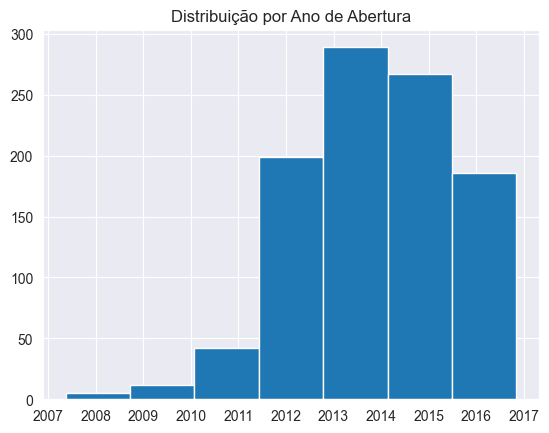

In [10]:
# A quantidade de Reclamações abertas por ano
plt.hist(df_2['DataAbertura'], bins=7)
plt.title('Distribuição por Ano de Abertura')
plt.show()

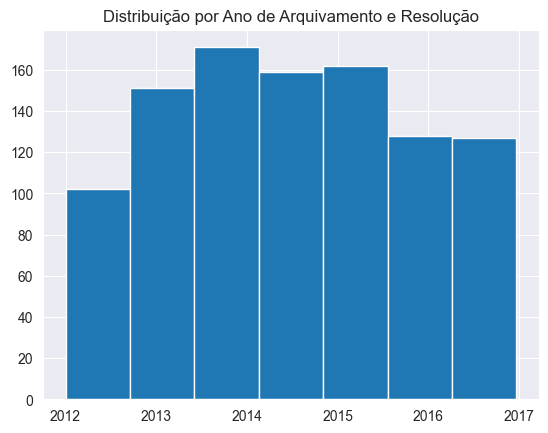

In [11]:
# A quantidade de Reclamações Arquivadas / Solucionadas por ano
plt.hist(df_2['DataArquivamento'], bins=7)
plt.title('Distribuição por Ano de Arquivamento e Resolução')
plt.show()

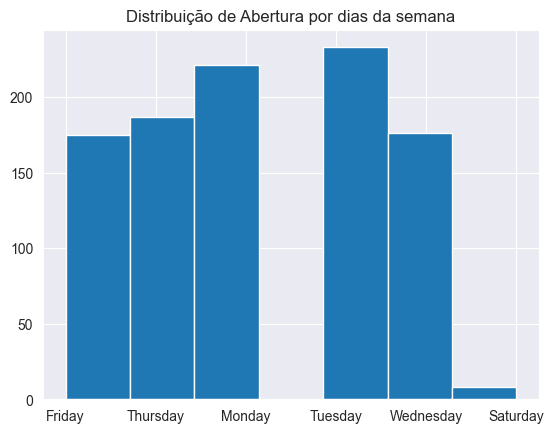

In [12]:
# A Quantidade de reclamações por dia da semana
plt.hist(df_2['DiaAbertura'], bins=7)
plt.title('Distribuição de Abertura por dias da semana')
plt.show()

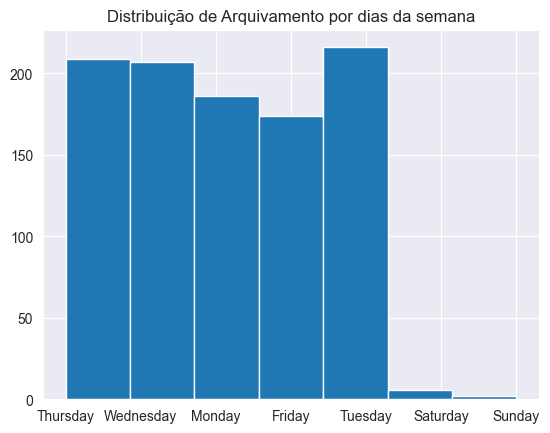

In [13]:
# A quantidade de Arquivamento / Resoluções por dia da semana
plt.hist(df_2['DiaArquivamento'], bins=7)
plt.title('Distribuição de Arquivamento por dias da semana')
plt.show()

In [14]:
#Cria as colunas Minuto, Hora, Dia, Semana, Mês e Ano no DataSet

df_2['MinutoAbertura'] = df_2['DataAbertura'].dt.minute
df_2['HoraAbertura'] = df_2['DataAbertura'].dt.hour
df_2['DiaAbertura'] = df_2['DataAbertura'].dt.day
df_2['SemanaAbertura'] = df_2['DataAbertura'].dt.weekday
df_2['MesAbertura'] = df_2['DataAbertura'].dt.month
df_2['AnoAbertura'] = df_2['DataAbertura'].dt.year

In [15]:
df_2.sample(5)

,AnoCalendario,DataArquivamento,DataAbertura,CodigoRegiao,Regiao,UF,strRazaoSocial,strNomeFantasia,Tipo,NumeroCNPJ,RadicalCNPJ,RazaoSocialRFB,NomeFantasiaRFB,CNAEPrincipal,DescCNAEPrincipal,Atendida,CodigoAssunto,DescricaoAssunto,CodigoProblema,DescricaoProblema,SexoConsumidor,FaixaEtariaConsumidor,CEPConsumidor,DiaAbertura,DiaArquivamento,MinutoAbertura,HoraAbertura,SemanaAbertura,MesAbertura,AnoAbertura
1034220,2016,2016-09-30 09:32:54,2016-07-14 10:50:41,2,Nordeste,PB,COMPANHIA DE ÁGUA E ESGOTOS DA PARAÍBA,CAGEPA,1,9123654000187.0,9123654.0,COMPANHIA DE AGUA E ESGOTOS DA PARAIBA CAGEPA,,3600601.0,"CAPTAÇÃO, TRATAMENTO E DISTRIBUIÇÃO DE ÁGUA",S,183,Água / Esgoto,240.0,SAC - Resolução de demandas (ausência de respo...,F,entre 41 a 50 anos,58020280.0,14,Friday,50,10,3,7,2016
94118,2012,2012-05-18 08:17:01,2011-08-05 09:29:24,5,Centro-oeste,DF,TIM CELULAR S.A.,TIM CELULAR,1,4206050000180.0,4206050.0,TIM CELULAR S.A.,,6120501.0,TELEFONIA MÓVEL CELULAR,S,101,"Telefone ( Convencional, Celular, Interfone, E...",102.0,"Garantia (Abrangência, cobertura, etc.)",F,entre 31 a 40 anos,,5,Friday,29,9,4,8,2011
505748,2014,2014-12-29 11:00:54,2014-10-28 18:26:44,2,Nordeste,MA,OI MOVEL S.A.,OI MOVEL,1,5423963000111.0,5423963.0,OI MOVEL S.A.,OI,6120501.0,TELEFONIA MÓVEL CELULAR,S,187,Telefonia Celular,136.0,Duvida sobre cobrança/valor/reajuste/contrato/...,M,entre 51 a 60 anos,65000000.0,28,Monday,26,18,1,10,2014
540453,2014,2014-03-13 10:45:14,2014-02-12 10:31:26,3,Sudeste,RJ,AMPLA ENERGIA E SERVIÇOS S.A,AMPLA,1,33050071000158.0,33050071.0,AMPLA ENERGIA E SERVICOS S.A.,AMPLA,3514000.0,DISTRIBUIÇÃO DE ENERGIA ELÉTRICA,S,185,Energia Elétrica,128.0,Recusa injustificada em prestar serviço,F,entre 61 a 70 anos,24043310.0,12,Thursday,31,10,2,2,2014
146050,2012,2012-11-30 16:16:27,2011-08-05 11:59:22,3,Sudeste,RJ,RICARDO ELETRO DIVINOPOLIS LTDA,"RICARDO ELETRO.COM (CITYLAR, INSINUANTE, TRICO...",1,64282601020142.0,64282601.0,RICARDO ELETRO DIVINOPOLIS LTDA,RICARDO ELETRO,4753900.0,COMÉRCIO VAREJISTA ESPECIALIZADO DE ELETRODOMÉ...,N,141,Outros Produtos Importados,107.0,Não entrega/demora na entrega do produto,F,entre 21 a 30 anos,23860000,5,Friday,59,11,4,8,2011


In [16]:
# Verificando os DTypes do DataSet
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 216661 to 530740
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   AnoCalendario          1000 non-null   int64         
 1   DataArquivamento       1000 non-null   datetime64[ns]
 2   DataAbertura           1000 non-null   datetime64[ns]
 3   CodigoRegiao           1000 non-null   int64         
 4   Regiao                 1000 non-null   object        
 5   UF                     1000 non-null   object        
 6   strRazaoSocial         1000 non-null   object        
 7   strNomeFantasia        1000 non-null   object        
 8   Tipo                   1000 non-null   int64         
 9   NumeroCNPJ             1000 non-null   object        
 10  RadicalCNPJ            1000 non-null   object        
 11  RazaoSocialRFB         1000 non-null   object        
 12  NomeFantasiaRFB        1000 non-null   object        
 13  C

In [17]:
# Calcula a diferença de tempo entre a DataArquivamento - DataAbertura
# Para saber quanto tempo a reclamação demorou para ser atendida
df_2 = df_2.sample(100)
df_2['datediff'] = df_2['DataArquivamento'] - df_2['DataAbertura']

In [18]:
df_2.sample(5)

,AnoCalendario,DataArquivamento,DataAbertura,CodigoRegiao,Regiao,UF,strRazaoSocial,strNomeFantasia,Tipo,NumeroCNPJ,RadicalCNPJ,RazaoSocialRFB,NomeFantasiaRFB,CNAEPrincipal,DescCNAEPrincipal,Atendida,CodigoAssunto,DescricaoAssunto,CodigoProblema,DescricaoProblema,SexoConsumidor,FaixaEtariaConsumidor,CEPConsumidor,DiaAbertura,DiaArquivamento,MinutoAbertura,HoraAbertura,SemanaAbertura,MesAbertura,AnoAbertura,datediff
286116,2013,2013-05-07 10:49:16,2009-06-30 10:22:05,5,Centro-oeste,GO,CCE INDUSTRIAS ELETROELETRONICAS S/A,,1,3950583000100.0,3950583.0,SANTRON INDUSTRIAS ELETROELETRONICAS S/A,,6462000.0,HOLDINGS DE INSTITUIÇÕES NÃO-FINANCEIRAS,S,102,Microcomputador / Produtos de Informática,102.0,"Garantia (Abrangência, cobertura, etc.)",M,entre 51 a 60 anos,74805240.0,30,Tuesday,22,10,1,6,2009,1407 days 00:27:11
3316,2012,2012-02-29 16:42:48,2011-12-12 16:43:44,3,Sudeste,MG,B2W - COMPANHIA GLOBAL DO VAREJO,SHOPTIME,1,776574000580.0,776574.0,B2W - COMPANHIA GLOBAL DO VAREJO,,4789099.0,COMÉRCIO VAREJISTA DE OUTROS PRODUTOS NÃO ESPE...,S,98,Artigos de Enxoval ( Cama / Mesa e Banho ),107.0,Não entrega/demora na entrega do produto,F,entre 61 a 70 anos,38035720,12,Wednesday,43,16,0,12,2011,78 days 23:59:04
333014,2013,2013-07-08 15:29:45,2013-01-14 09:38:48,2,Nordeste,RN,DIGITAL WORLD ELETRÔNICA ME,,1,8296219000191.0,8296219.0,L. R DA FONSECA - ME,DIGITAL WORD ELETRONICA,9521500.0,REPARAÇÃO E MANUTENÇÃO DE EQUIPAMENTOS ELETROE...,S,96,Televisão / Vídeo Cassete / Filmadora / Video-...,113.0,Falta de peca de reposição,M,entre 41 a 50 anos,59010080,14,Monday,38,9,0,1,2013,175 days 05:50:57
99170,2012,2012-09-18 09:12:12,2012-08-15 09:05:45,5,Centro-oeste,MS,BANCO VOTORANTIM S.A.,,1,59588111000103.0,59588111.0,BANCO VOTORANTIM S.A.,,6422100.0,"BANCOS MÚLTIPLOS, COM CARTEIRA COMERCIAL",S,63,Financeira,250.0,Crédito Consignado,M,entre 41 a 50 anos,79210000,15,Tuesday,5,9,2,8,2012,34 days 00:06:27
635878,2014,2014-05-27 09:21:33,2014-01-28 16:13:48,3,Sudeste,ES,BANCO BRADESCO SA - BMC - FINASA - BANKPAR - AMEX,"BRAD. CARTÕES, SAÚDE, PREV, CONS.E FINC INTERA...",1,60746948000112.0,60746948.0,BANCO BRADESCO SA,BRADESCO EST UNIF,6422100.0,"BANCOS MÚLTIPLOS, COM CARTEIRA COMERCIAL",N,53,Banco comercial,27.0,"Contrato (não cumprimento, alteração, transfer...",M,entre 61 a 70 anos,29140060.0,28,Tuesday,13,16,1,1,2014,118 days 17:07:45


In [19]:
# Deu certo com "W - Weeks", mas tentei mudar para "M - Months" e gerou erro
import numpy as np
df_2['datediff'] = df_2['datediff']/np.timedelta64(1, 'M') # D para dias, W para semanas e M para mês
df_2['datediff']

333014      5.653023
3316        2.548366
1082947     2.418502
422009      4.614976
352959      1.035052
764530      3.580858
136193      0.417846
794418     23.258828
154911     15.806828
413690      1.060993
1195378     0.708135
332224      9.352351
943148     11.548870
856143      0.686757
416115      3.448609
61385       4.487625
647408      1.514599
914037      1.099349
1113369     0.608711
99170       1.096919
378392     23.904010
633305      2.455777
184269      2.576495
646165      5.160845
456309      2.449806
750834      1.447123
142152      3.976031
1089080     2.264270
526117      6.934555
1049646     1.195582
563908      5.611263
177275      3.813990
1151054     5.573231
672007      0.871445
41928       0.718527
430573     32.541223
1142782     4.651480
556875      1.105421
549702      8.287370
1188508    10.713318
58222       0.902255
614573     11.481561
149533      0.638022
270196      8.094627
225544     19.261510
650665      4.133959
170500      1.873295
633435      1

In [20]:
df_2.sample(5)

,AnoCalendario,DataArquivamento,DataAbertura,CodigoRegiao,Regiao,UF,strRazaoSocial,strNomeFantasia,Tipo,NumeroCNPJ,RadicalCNPJ,RazaoSocialRFB,NomeFantasiaRFB,CNAEPrincipal,DescCNAEPrincipal,Atendida,CodigoAssunto,DescricaoAssunto,CodigoProblema,DescricaoProblema,SexoConsumidor,FaixaEtariaConsumidor,CEPConsumidor,DiaAbertura,DiaArquivamento,MinutoAbertura,HoraAbertura,SemanaAbertura,MesAbertura,AnoAbertura,datediff
794418,2015,2015-11-11 14:29:06,2013-11-20 13:55:00,4,Sul,SC,JULIANO SALDANHA ARAUJO - EPP,J. ARAUJO CONSTRUTORA,1,13578429000102.0,13578429.0,JULIANO SALDANHA ARAUJO - EPP,J. ARAUJO CONSTRUTORA,4120400.0,CONSTRUÇÃO DE EDIFÍCIOS,N,82,Incorporação ( Construtoras e Incorporadoras ),88.0,Não entrega do contrato,M,entre 21 a 30 anos,88820000.0,20,Wednesday,55,13,2,11,2013,23.258828
378392,2013,2013-07-30 10:10:33,2011-07-20 09:35:32,5,Centro-oeste,MS,BANCO MERCANTIL DO BRASIL SA,,1,17184037000110.0,17184037.0,BANCO MERCANTIL DO BRASIL SA,,6422100.0,"BANCOS MÚLTIPLOS, COM CARTEIRA COMERCIAL",S,63,Financeira,38.0,Não entrega de quitação/retenção de documentos,M,Nao Informada,79280000.0,20,Tuesday,35,9,2,7,2011,23.904010
646165,2014,2014-01-21 09:52:59,2013-08-14 10:12:53,3,Sudeste,ES,CLARO S.A.,CLARO,1,40432544000147.0,40432544.0,CLARO S.A.,CLARO,6120501.0,TELEFONIA MÓVEL CELULAR,N,187,Telefonia Celular,134.0,Cobrança indevida/abusiva,F,entre 21 a 30 anos,29141230.0,14,Tuesday,12,10,2,8,2013,5.160845
154559,2012,2012-12-18 16:36:04,2011-12-01 16:18:34,3,Sudeste,RJ,DELL COMPUTADORES DO BRASIL,DELL COMPUTADORES,1,72381189000625.0,72381189.0,DELL COMPUTADORES DO BRASIL LTDA,,2621300.0,FABRICAÇÃO DE EQUIPAMENTOS DE INFORMÁTICA,N,102,Microcomputador / Produtos de Informática,105.0,Produto com vício,M,entre 61 a 70 anos,21250200,1,Tuesday,18,16,3,12,2011,12.355231
324372,2013,2013-10-31 10:57:56,2013-06-18 11:36:02,2,Nordeste,AL,J.V. SILVA ELETRONICA,,1,5563633000121.0,5563633.0,J V SILVA ELETRONICOS ME,ELETRONICA MARECHAL,4756300.0,COMÉRCIO VAREJISTA ESPECIALIZADO DE INSTRUMENT...,S,146,Aparelho DVD,105.0,Produto com vício,M,entre 31 a 40 anos,57046350.0,18,Thursday,36,11,1,6,2013,4.353985


# Atividade 3

In [21]:
# Transformação para o horário em que foi aberta a reclamação e ver qual periodo do dia 
df_2['PeriodoDia'] = df_2.HoraAbertura.apply(lambda y: (y % 24 + 4)//4).replace({
    1:'Madrugada',
    2:'Cedo da Manhã',
    3:'Manhã',
    4:'Tarde',
    5:'Inicio da Noite',
    6:'Tarde da Noite'
})

In [22]:
# Verificar as colunas existentes no "df_2"
df_2.columns

Index(['AnoCalendario', 'DataArquivamento', 'DataAbertura', 'CodigoRegiao',
       'Regiao', 'UF', 'strRazaoSocial', 'strNomeFantasia', 'Tipo',
       'NumeroCNPJ', 'RadicalCNPJ', 'RazaoSocialRFB', 'NomeFantasiaRFB',
       'CNAEPrincipal', 'DescCNAEPrincipal', 'Atendida', 'CodigoAssunto',
       'DescricaoAssunto', 'CodigoProblema', 'DescricaoProblema',
       'SexoConsumidor', 'FaixaEtariaConsumidor', 'CEPConsumidor',
       'DiaAbertura', 'DiaArquivamento', 'MinutoAbertura', 'HoraAbertura',
       'SemanaAbertura', 'MesAbertura', 'AnoAbertura', 'datediff',
       'PeriodoDia'],
      dtype='object')

In [24]:
# O argumento AXIS especifica se as linhas(0) ou colunas (1) devem ser descartadas
# O argumento INPLACE especifica a remoção das colunas sem reatribuir o dataframe (persiste em memória a alteração)
cols = ['CodigoRegiao', 'Regiao', 'strRazaoSocial', 'strNomeFantasia',
       'Tipo', 'NumeroCNPJ', 'RadicalCNPJ', 'RazaoSocialRFB', 'NomeFantasiaRFB', 'CNAEPrincipal', 'DescCNAEPrincipal', 'Atendida',
       'CodigoAssunto', 'DescricaoAssunto', 'CodigoProblema', 'DescricaoProblema', 'SexoConsumidor', 'FaixaEtariaConsumidor',
       'CEPConsumidor', 'UF', 'DataAbertura']
df_2.drop(cols, axis=1, inplace=True)

In [26]:
# Verificando o DataSet novamente
df_2.sample(3)

,AnoCalendario,DataArquivamento,DiaAbertura,DiaArquivamento,MinutoAbertura,HoraAbertura,SemanaAbertura,MesAbertura,AnoAbertura,datediff,PeriodoDia
1056663,2016,2016-09-08 14:27:19,28,Thursday,57,10,3,4,2016,4.295013,Manhã
536500,2014,2014-02-05 09:52:44,26,Wednesday,25,10,4,4,2013,9.192811,Manhã
503409,2014,2014-09-10 11:12:51,20,Wednesday,15,11,2,8,2014,0.677350,Manhã


In [27]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 333014 to 521153
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   AnoCalendario     100 non-null    int64         
 1   DataArquivamento  100 non-null    datetime64[ns]
 2   DiaAbertura       100 non-null    int32         
 3   DiaArquivamento   100 non-null    object        
 4   MinutoAbertura    100 non-null    int32         
 5   HoraAbertura      100 non-null    int32         
 6   SemanaAbertura    100 non-null    int32         
 7   MesAbertura       100 non-null    int32         
 8   AnoAbertura       100 non-null    int32         
 9   datediff          100 non-null    float64       
 10  PeriodoDia        100 non-null    object        
dtypes: datetime64[ns](1), float64(1), int32(6), int64(1), object(2)
memory usage: 7.0+ KB


In [28]:
# Separação entre variáveis independentes e dependente
y = df_2['datediff']
X = df_2.drop('datediff', axis=1)

In [29]:
 # Separa entre treino e “test” com 30% de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=54545)

In [30]:
# Modelo com XGBoost Regressor 
from xgboost import XGBRegressor # -> Importa o algoritmo do XGBoost

In [31]:
# Instancia o XGBRegressor com Parametros Padrão
xgb_model = XGBRegressor() 

In [ ]:
df_2.sample(3)

In [ ]:
# Treinamento do modelo
xgb_model.fit(X_train, y_train)

In [ ]:
# Realiza a predição em dados desconhecidos
y_pred = xgb_model.predict(X_test)

In [ ]:
# Compara o valor real(y_test) e o valor predito(y_pred) e gera o R² que geralmente varia de 0 a 100 
r2_score(y_test, y_pred)

In [ ]:
# Modelo com Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# Instancia o random forest regressor com parametros padrão
rf_model = RandomForestRegressor()

In [ ]:
# Treinamento do modelo
rf_model.fit(X_train, y_train) 

In [ ]:
y_pred = rf_model.predict(X_test)

In [ ]:
r2_score(y_test, y_pred)

In [ ]:
# Tuning de parametros
n_estimators = [100, 150, 200, 250, 350, 400]
min_samples_split = [2, 6, 10]
min_samples_leaf = [2, 4, 6, 8]
max_features = ['auto', 'sqrt', 'log2', None]

parametros = {
    'n_estimators':n_estimators,
    'min_samples_split':min_samples_split,
    'min_samples_leaf':min_samples_leaf,
    'max_features':max_features
}

In [ ]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

In [ ]:
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

In [ ]:
gb_tuned = RandomizedSearchCV(estimator=GradientBoostingRegressor(random_state=37), 
                              param_distributions=parametros, 
                              cv=5, # Validação cruzada com 5 folds
                              n_iter=15,  # Interações
                              n_jobs=-1, # usa todos os processadores
                              verbose=1) # Exibe saida? 
gb_tuned.fit(X_train, y_train)

In [ ]:
# Realiza a predição em dados desconhecidos
y_pred = gb_tuned.predict(X_test)

In [ ]:
# Compara o valor real(y_test) e o valor predito(y_pred) e gera o R² que geralmente varia de 0 a 100
r2_score(y_test, y_pred)

In [ ]:
# Salva o modelo para uso posterior
import pickle 

pickle.dump(gb_tuned, open('gb_tuned.pkl', 'wb'))